In [1]:
include("vector_spaces_library.jl")
using LinearAlgebra

# Exercise 11.3: Manufacturing Company

# Exercise 11.4: Eigenfaces

In [2]:
import Images
import Glob
import ImageView

# Force the pixel values on the interval [0,1]
function clamp(val)
    if val > 1.0
        return 1.0
    end
    if val < 0.0
        return 0.0
    end
    return val
end

clamp (generic function with 1 method)

In [3]:
# Load the faces into the matrix F.
# Every column is one face
x = "datasets/att_faces/s1/1.pgm"
faces = map(x->Images.load(x), Glob.glob("*/*.pgm","datasets/att_faces"))
picsize = size(faces[1])
F = zeros(picsize[1]*picsize[2], length(faces))
for i = 1:length(faces)
   F[:,i] = reshape(map(Float64, faces[i]), size(F,1))
end

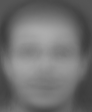

In [4]:
# Subtract the average face to compute Fnormalized
avg_face = zeros(picsize[1]*picsize[2])
for i = 1:picsize[1]*picsize[2]
   avg_face[i] = sum(F[i,:]) / length(faces)
end
Fnormalized = F .- avg_face
Images.colorview(Images.Gray, reshape(avg_face, picsize))

In [5]:
# Compute the vector space of the first N eigenfaces
# You don't have to understand this step to continue!
N = 20
AA = transpose(Fnormalized) * Fnormalized
EV = LinearAlgebra.eigvecs(AA)
eigenfaces = Fnormalized * EV[:,length(faces)-N+1:end]
Images.colorview(Images.Gray, reshape(eigenfaces[:,end-2], picsize));

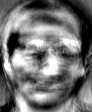

In [6]:
Images.colorview(Images.Gray, reshape(clamp.(eigenfaces[:,2] + avg_face), picsize))

In [7]:
f = rand(1:length(faces)) # face index
face = Fnormalized[:,f]
# =========================================================================================
# Reconstruct the face at index f as a linar combination of the eigenfaces

# 1. Build your basis by arranging the "eigenfaces" in a vector
# 2. perform the projection of the given face on the space spanned by the basis.

# projection = ...

# =========================================================================================

10304-element Vector{Float64}:
 -0.1318333333333334
 -0.15960784313725493
 -0.15269607843137256
 -0.14816666666666656
 -0.15302941176470586
 -0.17235294117647063
 -0.14525490196078425
 -0.17645098039215693
 -0.15326470588235286
 -0.1580294117647059
 -0.16082352941176467
 -0.16300980392156855
 -0.1614607843137255
  ⋮
 -0.12412745098039216
 -0.13180392156862755
 -0.15240196078431387
 -0.1615392156862746
 -0.16419607843137263
 -0.16695098039215694
 -0.15778431372549018
 -0.1981470588235295
 -0.15820588235294125
 -0.18446078431372553
 -0.199264705882353
 -0.20089215686274514

In [8]:
# uncomment the following line to see your result
#[faces[f] Images.colorview(Images.Gray, reshape(projection + avg_face, picsize))]